<center>
    <h1> Seminario de Modelos y Métodos Cuantitativos </h1>
    <h2> Tarea 3 </h2>
    <br>
    _Gabriel Molina_ -  gabriel.molina.12@sansano.usm.cl  -  rol: 201273575-0
</center>
</center>

In [18]:
from math import sqrt
from IPython.display import Math, Latex
from IPython.display import Image, display
from collections import defaultdict
import cairocffi as cairo
import random
import igraph as ig
import numpy as np
import matplotlib.pylab as plt

# ---- utility
def plot_as_png(plot):
    sur = plot._surface 
    ctx = plot._ctx 
    plot.redraw(ctx)
    sur.write_to_png('/tmp/temp.png') 
    display(Image('/tmp/temp.png'))
    
def explotar(aux,gr,cb,initb,tava):
    state=False
    c1 = initb[aux]
    c2 = cb[aux]
    if(c1<=c2):
        initb[aux]= initb[aux] +1
        return initb,tava
    else:
        state=True
        nb=gr.neighbors(aux)
        initb[aux]-=len(nb)
        tava+=len(nb)
        for i in nb:
            initb,tava=explotar(i,gr,cb,initb,tava)
        return initb,tava
    
    

# 1.

In [30]:
ER = ig.Graph.Erdos_Renyi(80, 0.2)
list1 = []
list2 = []
modulo1 = []
modulo2 = []

for i,j,k,w in zip(range(0,20),range(20,40),range(40,60),range(60,80)):
    list1.append(i)
    list2.append(j)
    list1.append(k)
    list2.append(w)
    
bordes = ER.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))

for i in range(100):
    auxiliar_mod1 = []  
    auxiliar_mod2 = []

    for prob in np.arange(0.0, 1.1, 0.1):
        P1 = ig.Graph(80, directed=True)
        P2 = ig.Graph(80, directed=True)
        for edge in ER.es:
            p = random.random() 
            source = edge.tuple[0]
            target = edge.tuple[1]

            if edge in bordes:
                if p <= prob:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)

            else:
                if p <= 0.5:
                    P1.add_edge(source, target)
                    P2.add_edge(source, target)
                else:
                    P1.add_edge(target, source)
                    P2.add_edge(target, source)

        edges1 = P1.es.select(_between=(ER.vs[0:40], ER.vs[40:80]))
        edges2 = P2.es.select(_between=(ER.vs.select(list1), ER.vs.select(list2)))

        for e1 in P1.es:
            if e1 not in edges1:
                P1.delete_edges(e1)

        for e2 in P2.es:
            if e2 not in edges1:
                P2.delete_edges(e2)
                
        #greedy para grafo dirigido
        salida = (P1.community_edge_betweenness()).as_clustering()
        salida2 = (P2.community_edge_betweenness()).as_clustering()

        auxiliar_mod1.append(P1.modularity(salida))
        auxiliar_mod2.append(P2.modularity(salida2))

    modulo1.append(auxiliar_mod1)
    modulo2.append(auxiliar_mod2)


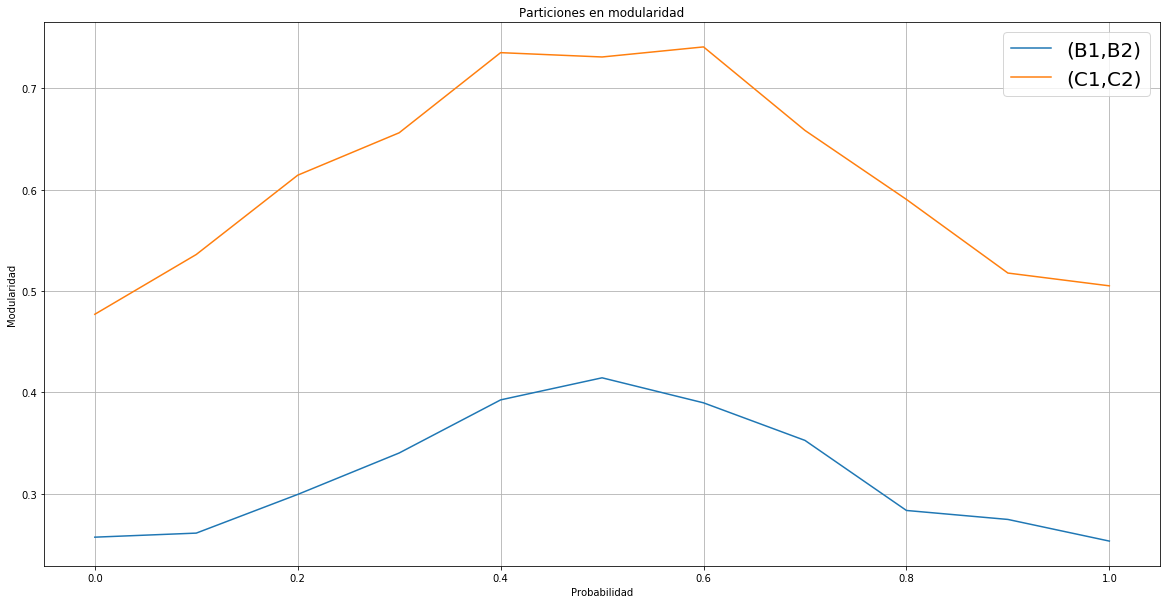

In [31]:
modulo_final1 = [sum(x)/11 for x in zip(*modulo1)]
modulo_final2 = [sum(x)/11 for x in zip(*modulo2)]

plt.figure(figsize=(20,10))
plt.plot(np.arange(0.0, 1.1, 0.1),modulo_final1, label='(B1,B2)')
plt.plot(np.arange(0.0, 1.1, 0.1),modulo_final2 , label= '(C1,C2)')
plt.title("Particiones en modularidad")
plt.xlabel("Probabilidad") 
plt.ylabel("Modularidad")
plt.grid(True)
plt.legend(loc="upper right",fontsize=20)
plt.show()
plt.close()

# 2.

## a)

In [23]:
pescado = ig.read("datos/pescado.net")
matriz_adyacencia = pescado.get_adjacency()
vertices = matriz_adyacencia.shape[0]
print("Cantidad de vertices:",vertices)
aux_arc = 0
aux_p1 = 0
for i in range(vertices):
    for j in range(vertices):
        if i != j:
            aux_p1 += matriz_adyacencia[i][j]*matriz_adyacencia[j][i]
        if matriz_adyacencia[i][j] != 0:
            aux_arc += 1
aux_p1 = aux_p1/float(aux_arc)
a = float(aux_arc)/(vertices*(vertices-1))
rho = (aux_p1-a)/(1-a)
print("Reprocicidad Actual: ", aux_p1)
print("Reprocicidad Corregida: ", rho)

Cantidad de vertices: 151
Reprocicidad Actual:  0.467201166180758
Reprocicidad Corregida:  0.3937559737764578


## c)

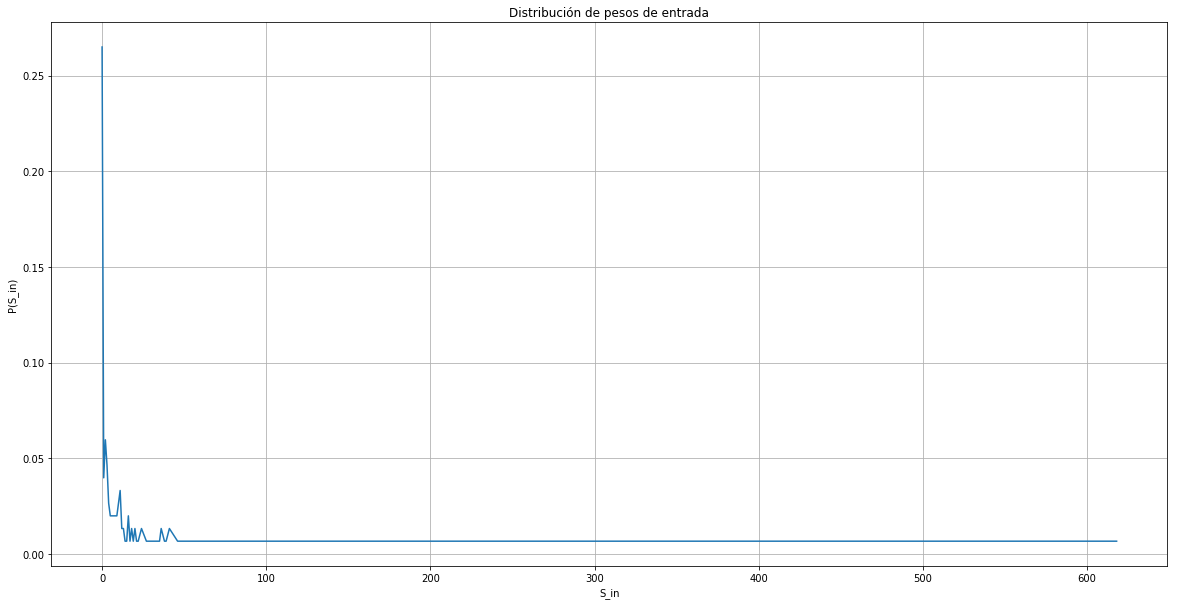

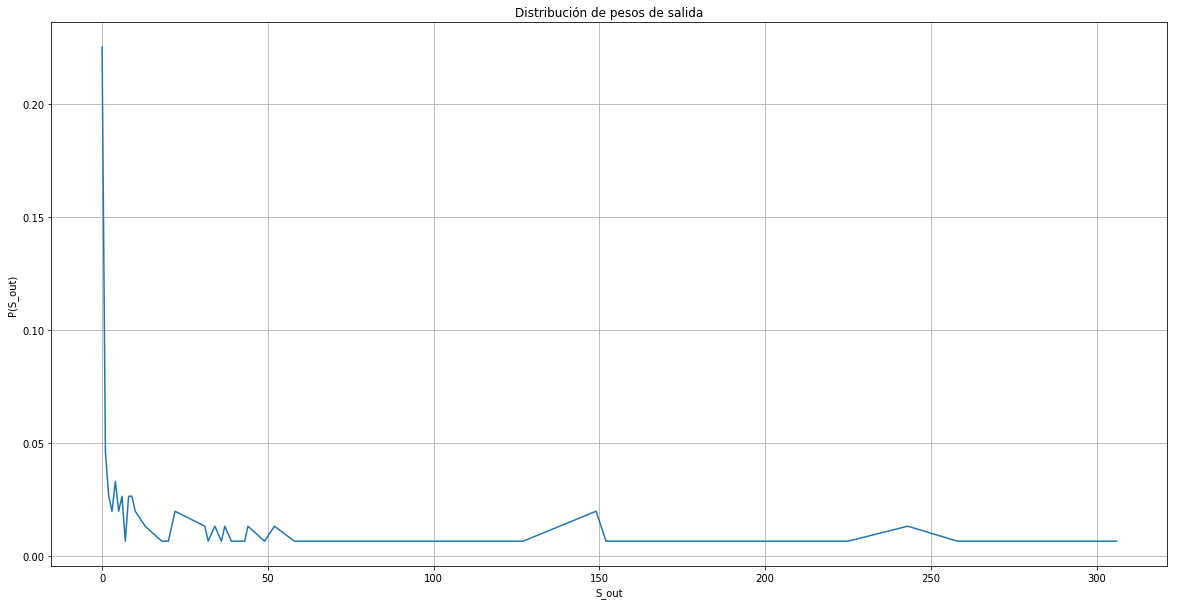

In [56]:
lista_S_in = []
tot_in = 0
lista_S_out = []
tot_out = 0
nodos = pescado.vs
for nodo in range(len(nodos)):
    aux_in = 0
    aux_out = 0
    for arco_out, arco_in in zip(pescado.es.select(_source=nodo), pescado.es.select(_to=nodo)):
        aux_out += arco_out['weight']
        tot_out += arco_out['weight']
        aux_in += arco_in['weight']
        tot_in += arco_in['weight']
    lista_S_in.append(aux_in)
    lista_S_out.append(aux_out)
    
ploteo_S_in = sorted(set(map(int,lista_S_in)))
ploteo_S_out = sorted(set(map(int,lista_S_out)))
aux_plot_S_in = list(map( lambda x: list(map(int,lista_S_in)).count(x)/float(len(lista_S_in)) , ploteo_S_in))
aux_plot_S_out = list(map( lambda x: list(map(int,lista_S_out)).count(x)/float(len(lista_S_out)) , ploteo_S_out))

plt.figure(figsize=(20,10))
plt.plot(ploteo_S_in[:-15] ,aux_plot_S_in[:-15])
plt.title("Distribución de pesos de entrada")
plt.xlabel("S_in") 
plt.ylabel("P(S_in)")
plt.grid(True)
plt.show()
plt.close()

plt.figure(figsize=(20,10))
plt.plot(ploteo_S_out[:-25] ,aux_plot_S_out[:-25])
plt.title("Distribución de pesos de salida")  
plt.xlabel("S_out") 
plt.ylabel("P(S_out)")
plt.grid(True)
plt.show()
plt.close()

## d)

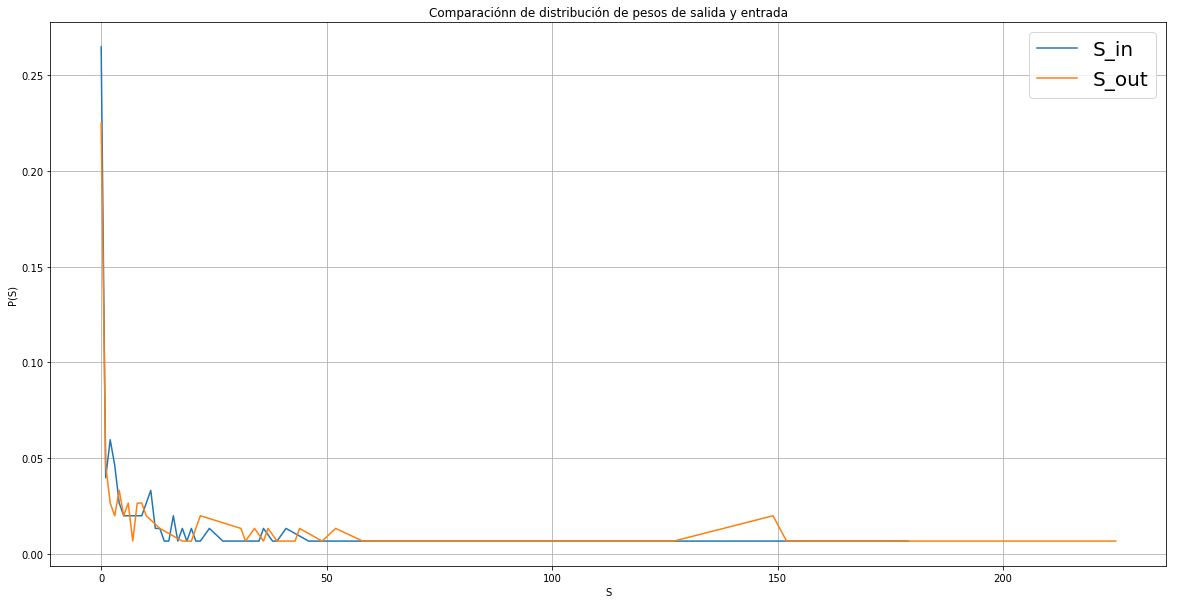

In [57]:
plt.figure(figsize=(20,10))
plt.plot(ploteo_S_in[:-25] ,aux_plot_S_in[:-25],label = "S_in")
plt.plot(ploteo_S_out[:-30] ,aux_plot_S_out[:-30],label = "S_out")
plt.title("Comparaciónn de distribución de pesos de salida y entrada")  
plt.xlabel("S") 
plt.ylabel("P(S)")
plt.legend(loc="upper right",fontsize=20)
plt.grid(True)
plt.show()
plt.close()

## Conviertiendo la red a no dirigida 

In [60]:
pescado_nd = ig.read("datos/pescado.net")
pescado_nd.to_undirected(mode="collapse", combine_edges="sum")

IGRAPH U-W- 151 2103 -- 
+ attr: id (v), x (v), y (v), z (v), weight (e)


## e)

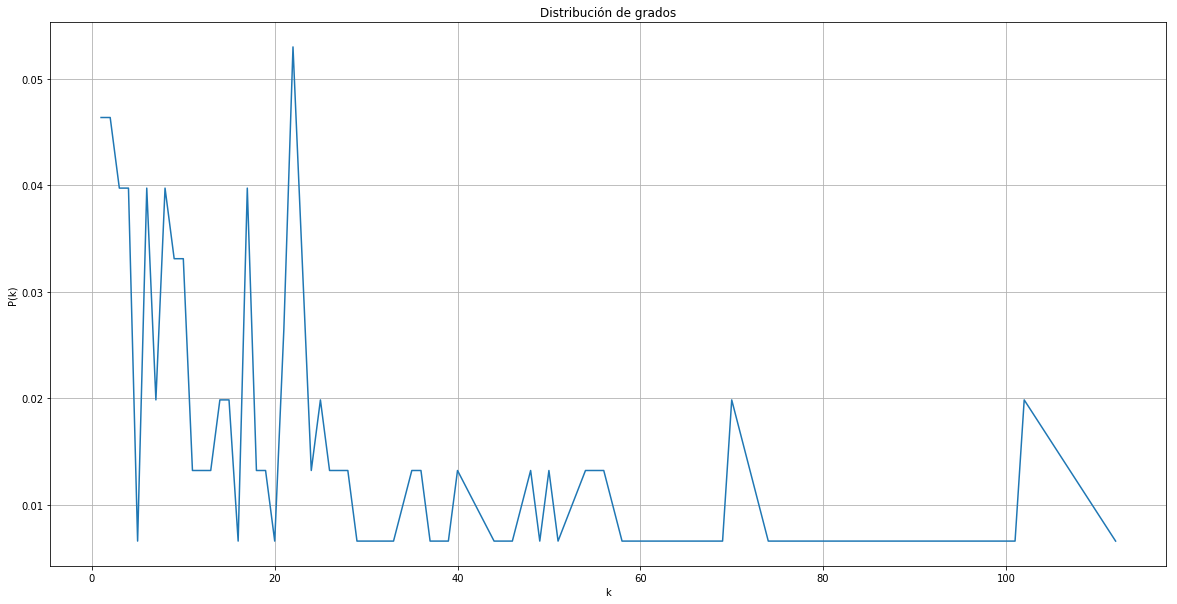

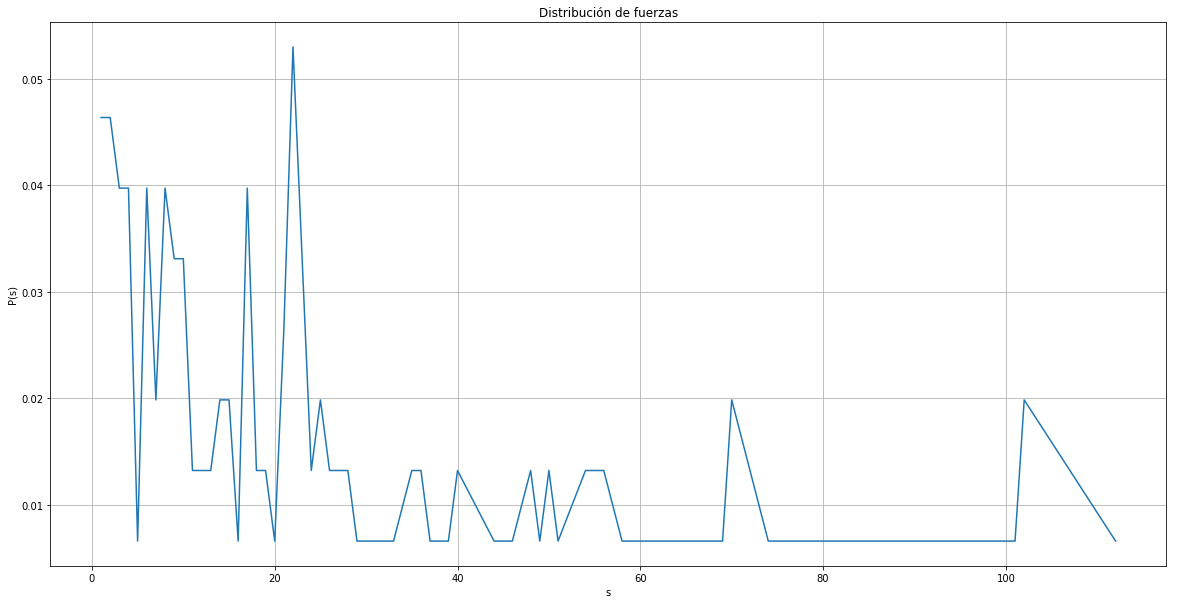

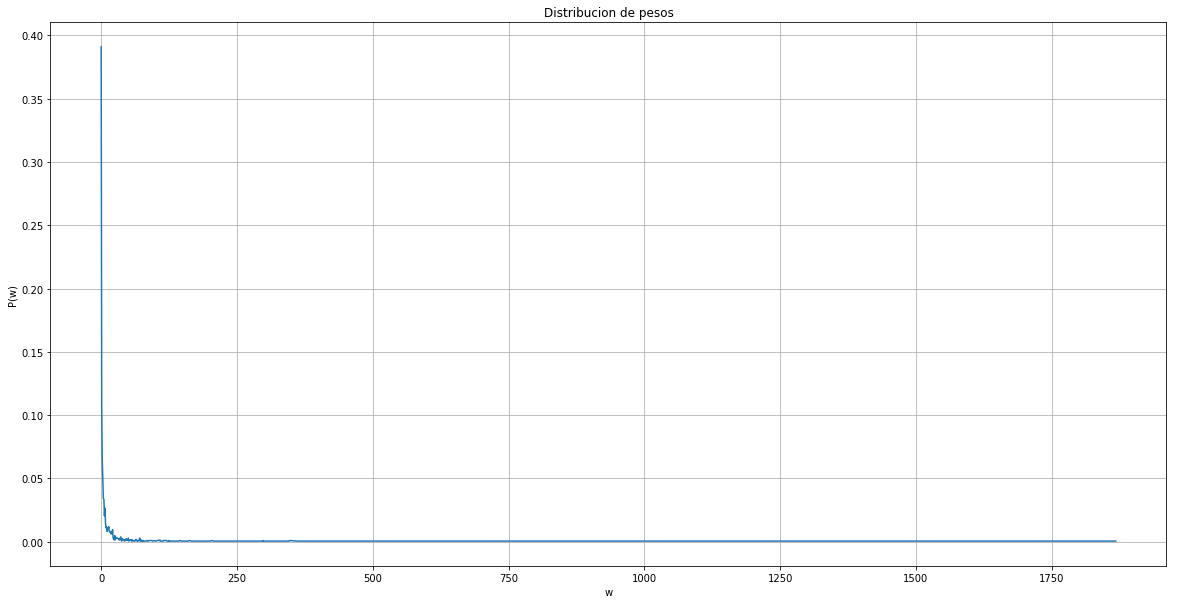

In [69]:
aux = []
k= pescado_nd.outdegree()
k_plot = sorted(set(k))
ploteo_pk=  list(map( lambda x: k.count(x)/float(len(k)) , k_plot))
s = pescado_nd.strength()
s_plot = sorted(set(s))
ploteo_ps=  list(map( lambda x: s.count(x)/float(len(s)) , s_plot))
for i in pescado_nd.es:
    aux.append(i['weight'])
w_plot = sorted(set(map(int,aux)))
ploteo_pw =  list(map( lambda x:list( map(int,aux)).count(x)/float(len(aux)) , w_plot))
plt.figure(figsize=(20,10))
plt.plot(k_plot , ploteo_pk)
plt.title("Distribución de grados")
plt.xlabel("k") 
plt.ylabel("P(k)")
plt.grid(True)
plt.show()
plt.close()
plt.figure(figsize=(20,10))
plt.plot(s_plot , ploteo_ps)
plt.title("Distribución de fuerzas")
plt.xlabel("s") 
plt.ylabel("P(s)")
plt.grid(True)
plt.show()
plt.close()
plt.figure(figsize=(20,10))
plt.plot(w_plot , ploteo_pw)
plt.title("Distribucion de pesos")
plt.xlabel("w") 
plt.ylabel("P(w)")
plt.grid(True)
plt.show()
plt.close()

## f)

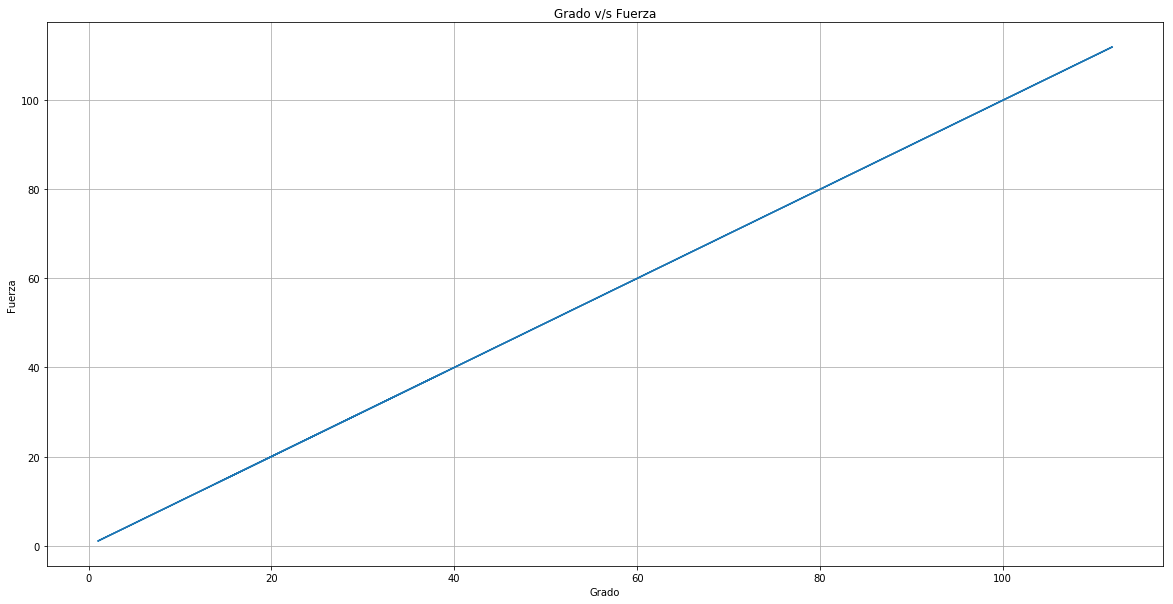

In [71]:
plt.figure(figsize=(20,10))
plt.plot(pescado_nd.indegree(),pescado_nd.strength())
plt.title("Grado v/s Fuerza")
plt.xlabel("Grado") 
plt.ylabel("Fuerza")
plt.grid(True)
plt.show()
plt.close()

## g)

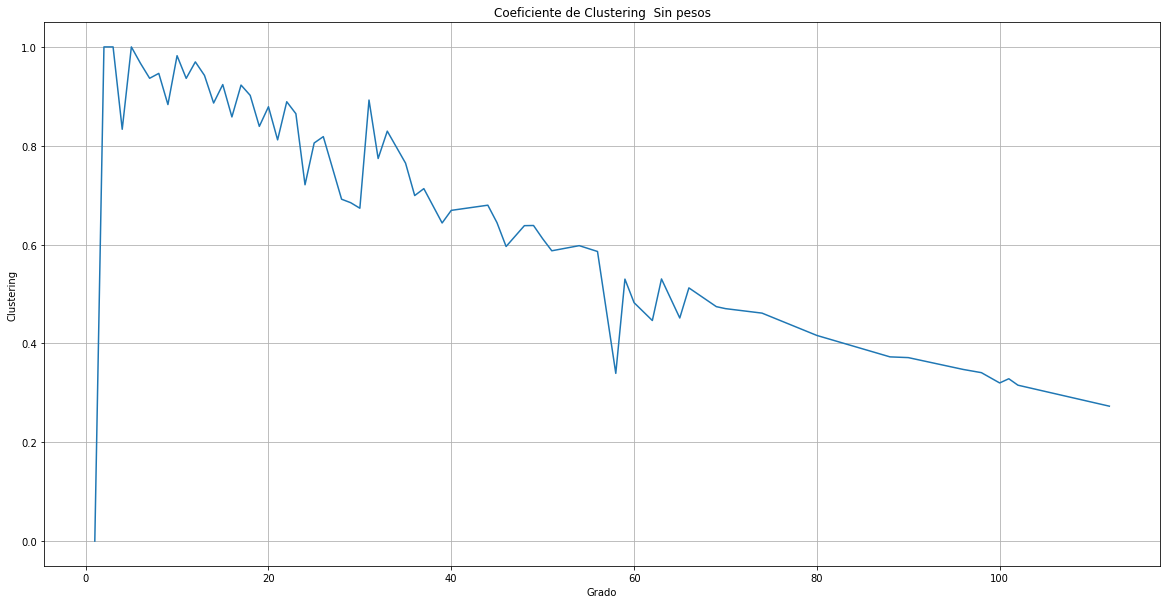

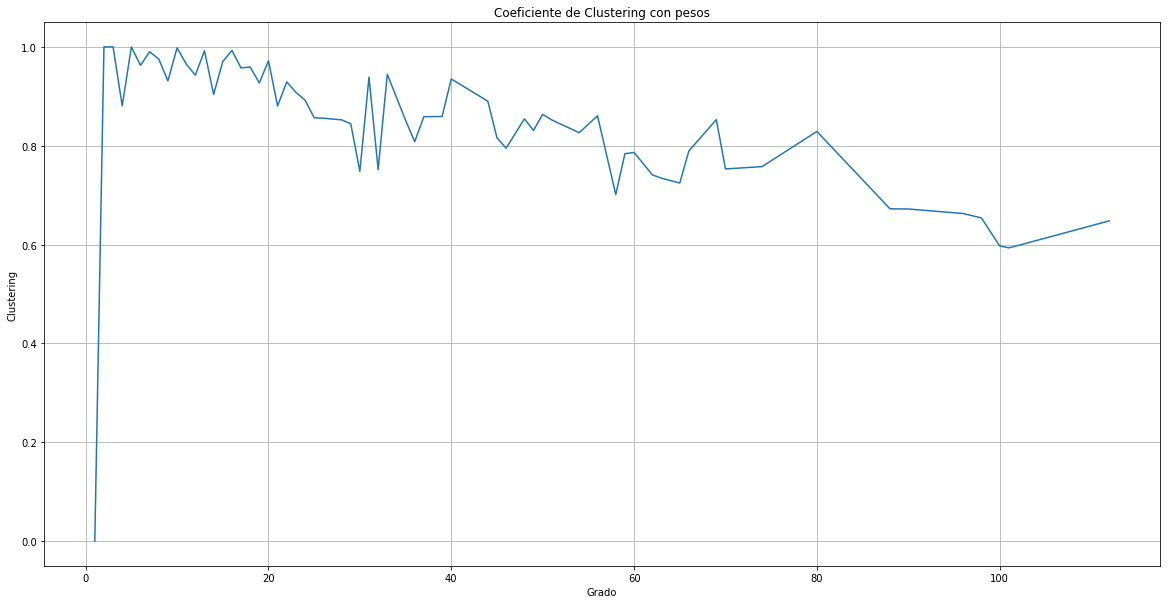

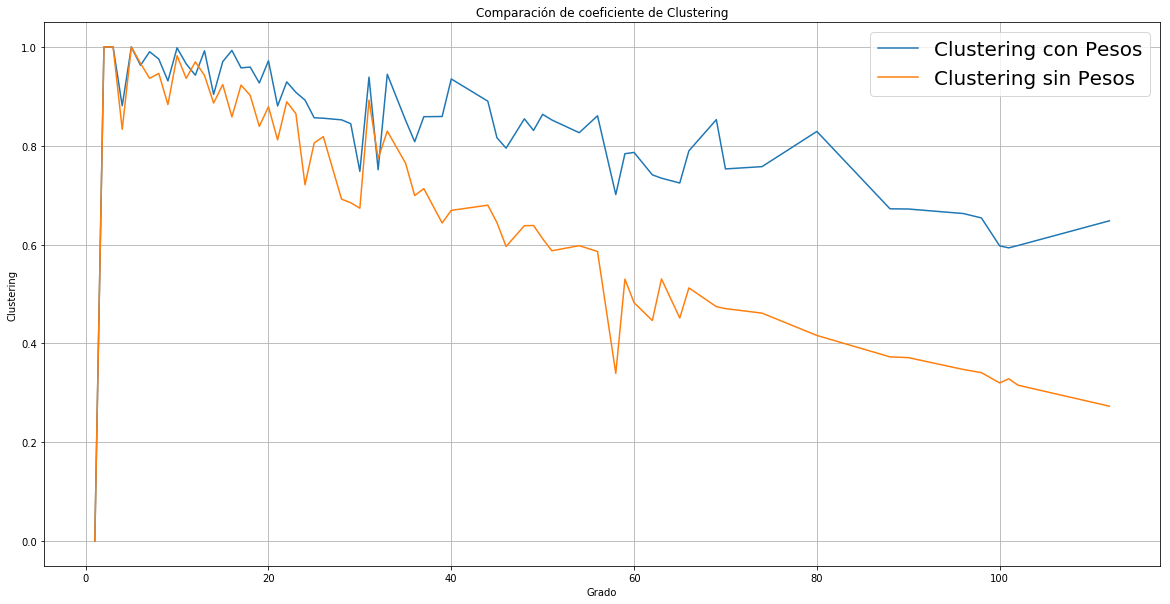

In [74]:
grad = pescado_nd.degree()
clustering_1= pescado_nd.transitivity_local_undirected(vertices=pescado_nd.vs, mode="zero")
clustering_2 = pescado_nd.transitivity_local_undirected(vertices=pescado_nd.vs, mode="zero" ,weights= pescado_nd.es['weight'])
aux_1 = []
aux_2 = []
ploteo_clustering1 = []
ploteo_clustering2 = []
for i in range(max(grad)+1):
    aux_1.append(list())
    aux_2.append(list())
    for j in range(len(grad)):
        if i == grad[j]:
            aux_1[i].append(clustering_1[j])
            aux_2[i].append(clustering_2[j])
for i in range(len(aux_1)):
    if len(aux_1[i]) > 0:
        ploteo_clustering1.append(sum(aux_1[i])/len(aux_1[i]))
    if len(aux_2[i]) > 0:
        ploteo_clustering2.append(sum(aux_2[i])/len(aux_2[i]))
plt.figure(figsize=(20,10))
plt.plot(list(set(grad)),ploteo_clustering1, label='Clustering sin Pesos')
plt.title("Coeficiente de Clustering  Sin pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()
plt.figure(figsize=(20,10))
plt.plot(list(set(grad)), ploteo_clustering2, label='Clustering con Pesos')
plt.title("Coeficiente de Clustering con pesos")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()
plt.close()

plt.figure(figsize=(20,10))
plt.plot(list(set(grad)), ploteo_clustering2, label='Clustering con Pesos')
plt.plot(list(set(grad)),ploteo_clustering1, label='Clustering sin Pesos')
plt.title("Comparación de coeficiente de Clustering")
plt.xlabel("Grado")
plt.ylabel("Clustering")
plt.legend(loc="upper right",fontsize=20)
plt.grid(True)
plt.show()
plt.close()

# 3.

In [ ]:
scientometrics = ig.read("datos/scientometrics.net")
ig.summary(scientometrics)

visual_style = {
    'vertex_size':15,
    'vertex_label_size':10,
    'vertex_color':'tomato',
    'bbox':(450,450),
    'margin':15
}1777, 0, 3, 0, 0, 0, 0, 0, 0]


plot_as_png(ig.plot(scientometrics, **visual_style))

IGRAPH D--- 1656 4123 -- 


In [105]:
print(scientometrics.motifs_randesu_no(size=3, cut_prob=None))
print(scientometrics.motifs_randesu(size=3, cut_prob=None, callback=None))

50583
[nan, nan, 16464, nan, 9761, 3, 22575, 1777, 0, 3, 0, 0, 0, 0, 0, 0]


# 4.

In [3]:
import powerlaw
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sb
import pandas as pd

## a)

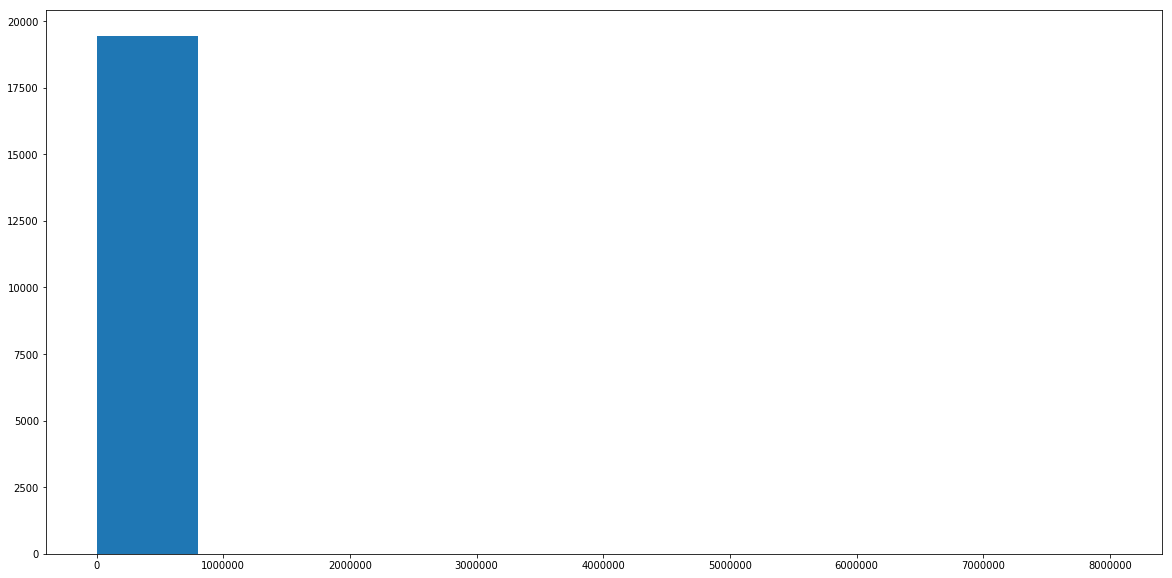

In [43]:
plt.figure(figsize=(20,10))
plt.hist(cities)
plt.show()

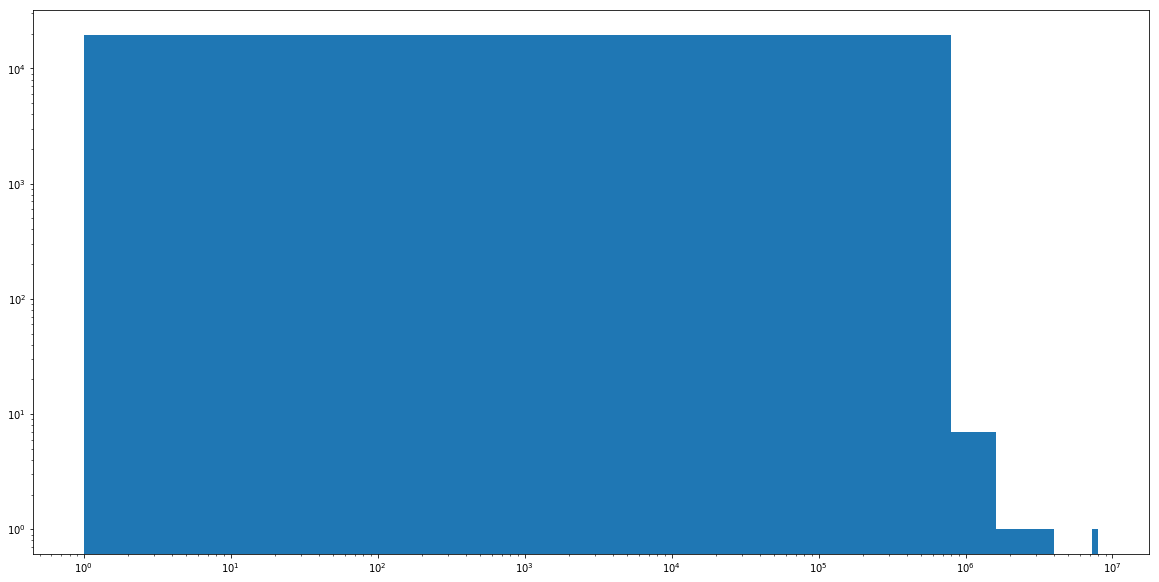

-0.00242088151403


In [102]:
plt.figure(figsize=(20,10))
plt.hist(cities)
hx,x= np.histogram(cities,bins='doane')
hxl = [numpy.max(hx),numpy.min(hx)]
xl = [numpy.min(x), numpy.max(x)]
plt.xscale('log')
plt.yscale('log')
plt.show()
cities1,cities2= numpy.histogram(cities,bins='doane')
dato1 = [numpy.max(cities1),numpy.min(cities1)]
dato2 = [numpy.min(cities2), numpy.max(cities2)]
slope = (dato1[1]-dato1[0]) /(dato2[1]-dato2[0])
print(slope)

## b)

In [ ]:
minimo, maximo = numpy.min(cities), numpy.max(cities)
bins = [minimo]
val = bins[0]
while val < max_:
    val = val * 10
    bins.append(cur_val)

/home/gabo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


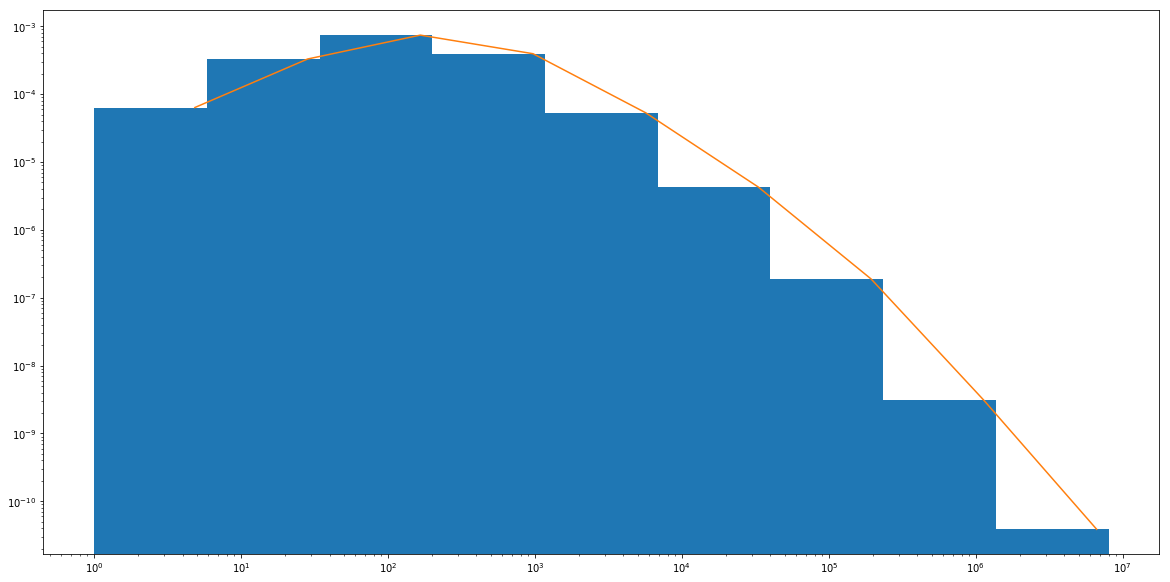

Pendiente: -3.691490218090457e-11


In [148]:
bins = numpy.logspace(numpy.log10(minimo),numpy.log10(maximo),10)
h, estp,_=ax1.hist(cities, bins=bins, normed=True,log=True,color='y',zorder=1)
middle_estp = estp[1:] - estp[:-1]
slope, intercept = numpy.polyfit(middle_estp, h, 1) 
plt.figure(figsize=(20,10))
plt.hist(cities, bins=bins, normed=True,log=True)
plt.plot(bins[1:]-bins[:-1],h)
plt.xscale('log')
plt.yscale('log')
plt.show()

print('Pendiente: {}'.format(slope))

/home/gabo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


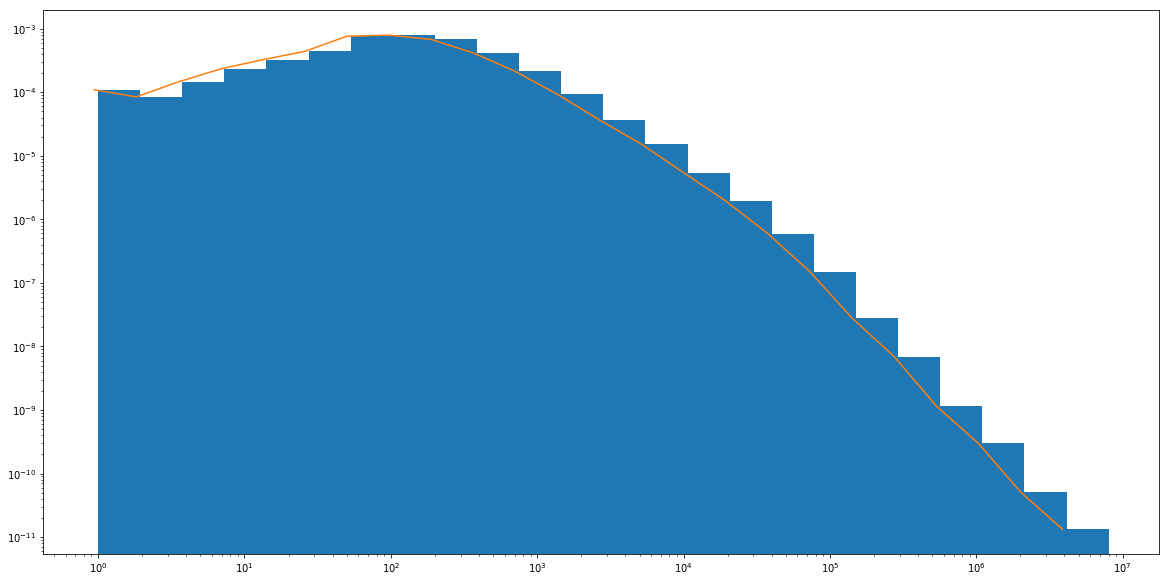

Pendiente: -8.145842415328943e-11


In [154]:
bins = numpy.logspace(numpy.log10(minimo),numpy.log10(maximo),25)
h, estp,_=ax1.hist(cities, bins=bins, normed=True,log=True,color='y',zorder=1)
middle_estp = estp[1:] - estp[:-1]
slope, intercept = numpy.polyfit(middle_estp, h, 1) 
plt.figure(figsize=(20,10))
plt.hist(cities, bins=bins, normed=True,log=True)
plt.plot(bins[1:]-bins[:-1],h)
plt.xscale('log')
plt.yscale('log')
plt.show()
print('Pendiente: {}'.format(slope))

/home/gabo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


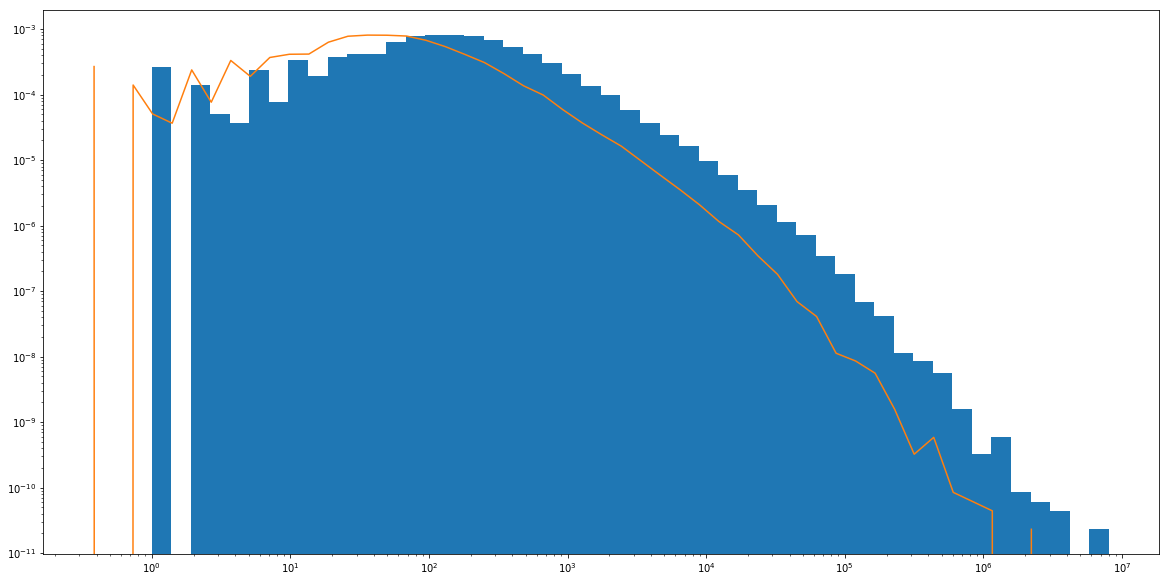

Pendiente: -1.6114651294112542e-10


In [150]:
bins = numpy.logspace(numpy.log10(minimo),numpy.log10(maximo),50)
h, estp,_=ax1.hist(cities, bins=bins, normed=True,log=True,color='y',zorder=1)
middle_estp = estp[1:] - estp[:-1]
slope, intercept = numpy.polyfit(middle_estp, h, 1) 
plt.figure(figsize=(20,10))
plt.hist(cities, bins=bins, normed=True,log=True)
plt.plot(bins[1:]-bins[:-1],h)
plt.xscale('log')
plt.yscale('log')
plt.show()
print('Pendiente: {}'.format(slope))

/home/gabo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


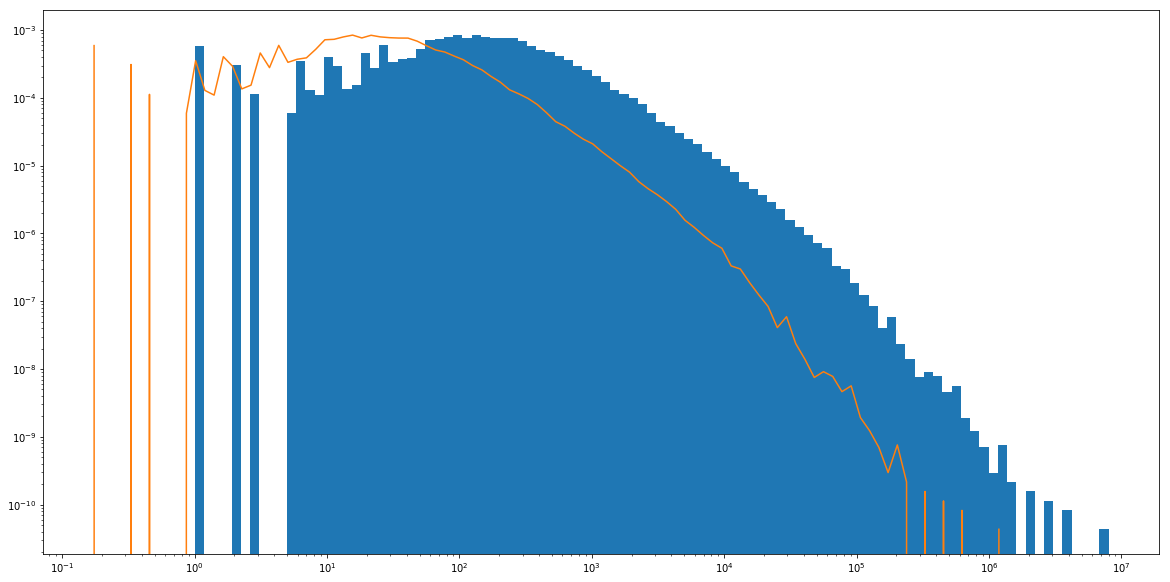

Pendiente: -3.2530628162174747e-10


In [151]:
bins = numpy.logspace(numpy.log10(minimo),numpy.log10(maximo),100)
h, estp,_=ax1.hist(cities, bins=bins, normed=True,log=True,color='y',zorder=1)
middle_estp = estp[1:] - estp[:-1]
slope, intercept = numpy.polyfit(middle_estp, h, 1) 
plt.figure(figsize=(20,10))
plt.hist(cities, bins=bins, normed=True,log=True)
plt.plot(bins[1:]-bins[:-1],h)
plt.xscale('log')
plt.yscale('log')
plt.show()
print('Pendiente: {}'.format(slope))

## c)

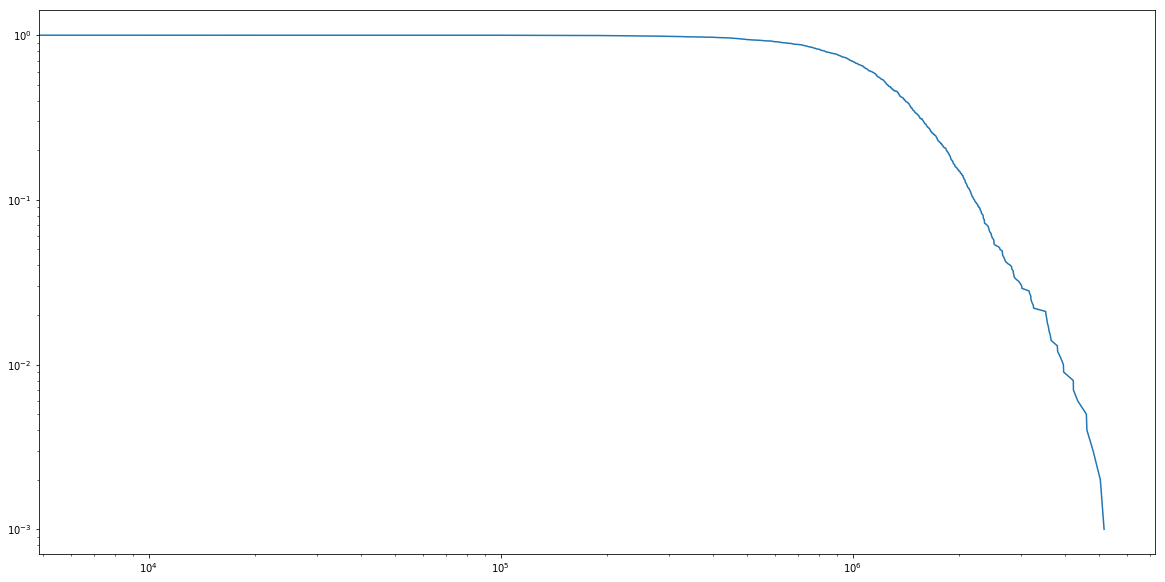

2.998001998
4.87475486284
8.51436948616
15.5727280237
29.2611072617
55.807183827
107.288383227
207.126635601
400.74443692
776.230306273
1504.41561322
2916.59616258
5655.25881472
10966.3878525
21266.3390471
41241.1869292
79978.7052315
155102.948133
300792.504896
583330.419821
1131260.3823
2193869.07274
4254601.84213
8251011.41888
16001307.6933


In [168]:

sorted_data = numpy.sort(numpy.unique(data))
zeros = numpy.zeros(sorted_data.shape[0])
for i, val in enumerate(sorted_data):
    zeros[i] = numpy.sum(data >= val)/float(len(data))
                                                
plt.figure(figsize=(20,10))
plt.plot(sorted_data,zeros)
plt.xscale('log')
plt.yscale('log')
plt.show()


bins = numpy.logspace(numpy.log10(minimo),numpy.log10(maximo),25)
for i in bins:
    curba = 1 + len(zeros)/numpy.sum((zeros/(i)))
    print(curba)

# 5.

Grados --> ER: 2.0   BA: 1.998


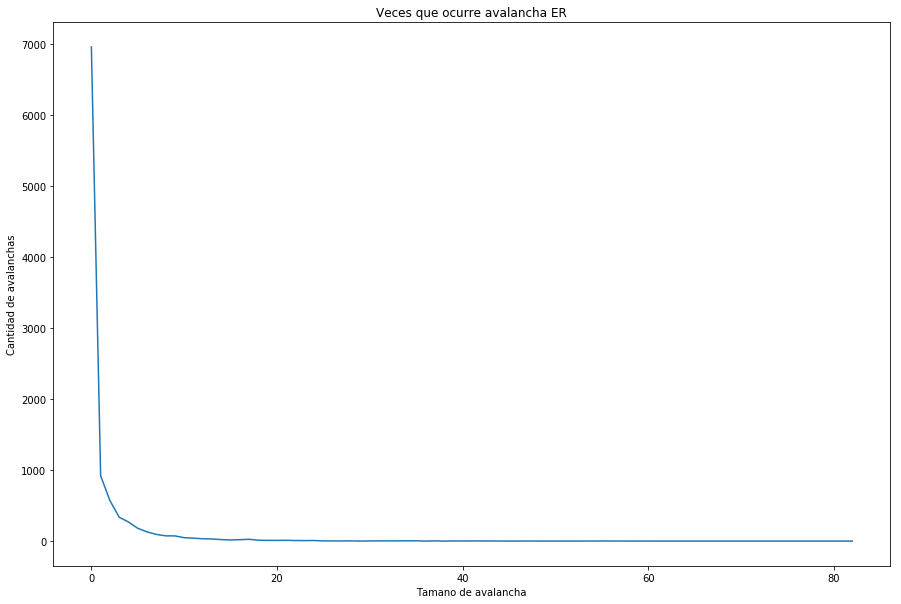

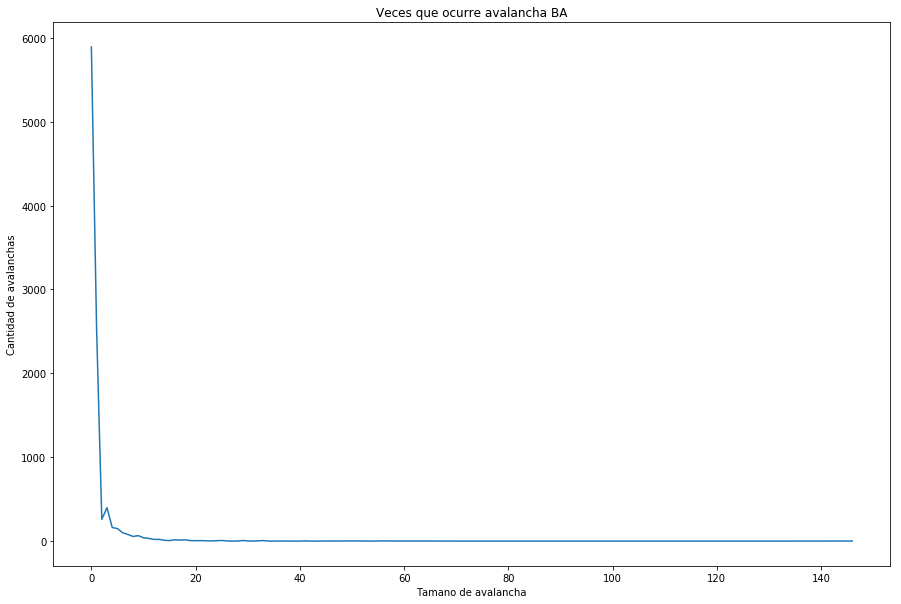

In [25]:
from igraph import *
from numpy import std
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd
import scipy.stats as stats

ER = Graph().Erdos_Renyi(n=1000,m=1000)
BA = Graph().Barabasi(n=1000)
original=ER.degree_distribution()
original_2=BA.degree_distribution()
print("Grados --> ER: {}   BA: {}".format(original.mean,original_2.mean))
cb=ER.degree()
initb=list(np.zeros(1000))
ava=[]
state=False
for v in range(10000):
    avala=0
    aux=np.random.randint(1000)
    initb,avala=explotar(aux,ER, cb,initb,avala)
    ava.append(avala)
basic_value=sorted(set(ava))
freqs=[]
for value in basic_value:
    freqs.append(ava.count(value))

plt.figure(figsize=(15,10))
plt.plot(basic_value,freqs)
plt.title("Veces que ocurre avalancha ER")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.show()


cb=BA.degree()
initb=list(np.zeros(1000))
ava=[]
state=False
for v in range(10000):
    avala=0
    aux=np.random.randint(1000)
    initb,avala=explotar(aux,BA, cb,initb,avala)
    ava.append(avala)
basic_value=sorted(set(ava))
freqs=[]
for value in basic_value:
    freqs.append(ava.count(value))

plt.figure(figsize=(15,10))
plt.plot(basic_value,freqs)
plt.title("Veces que ocurre avalancha BA")
plt.xlabel("Tamano de avalancha")
plt.ylabel("Cantidad de avalanchas")
plt.show()